In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
import shutil
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset'

# Load Meanbrain


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 580.54 ms


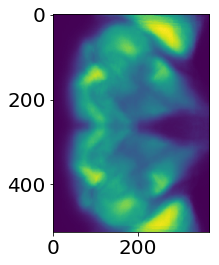

In [4]:
file = os.path.join(root_directory, '2019_nov_meanbrain', 'meanbrain_final.nii')
meanbrain = bbb.load_numpy_brain(file)
meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))
plt.imshow(meanbrain.numpy()[:,:,150])

# Load warped ROI


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 318.98 ms


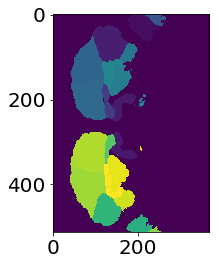

In [5]:
roi_file = os.path.join(root_directory, '2019_nov_meanbrain', 'template alignment', 'roi2mean_n4.nii')
roi = bbb.load_numpy_brain(roi_file)
plt.imshow(roi[:,:,80])
roi = ants.from_numpy(roi)
ants.set_spacing(roi, (0.767992056719373, 0.767992056719373, 1.0))

# Load Anatomies

In [6]:
flies = ['fly_1',
         'fly_3',
         'fly_5',
         'fly_7',
         'fly_19',
         'fly_21',
         'fly_48',
         'fly_51',
         'fly_54',
         'fly_68']

anatomy = {}

for fly in flies:
    anat_folder = os.path.join(root_directory, fly, 'anat_0')
    try:
        anatomy[fly] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy_channel_1.nii'))
        print('Loaded {}'.format(fly))
    except:
        print('failed to load anatomy_channel_1.nii: {}'.format(fly))
        try:
            anatomy[fly] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy.nii'))
        except:
            print('failed to load anatomy.nii: {}'.format(fly))


~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_1

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 361.72 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_3

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 467.23 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_5

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 320.99 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_7

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 421.30 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_19

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 556.12 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_21

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 355.76 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 355.99 ms
Loaded fly_48

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 323.23 ms
Loaded fly_51

~~ load_numpy_brain ~~
lo

In [7]:
to_rotate = ['fly_1', 'fly_7']
for k in to_rotate:
    anatomy[k] = np.swapaxes(anatomy[k],0,1)

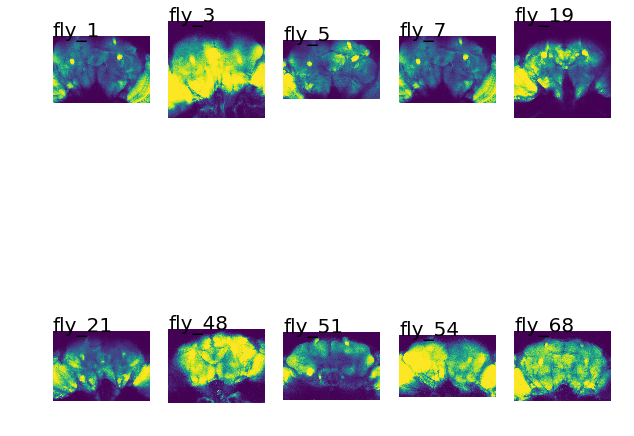

In [8]:
plt.figure(figsize=(10,10))
for i,k in enumerate(anatomy):
    plt.subplot(2,5,i+1)
    plt.imshow(anatomy[k][:,:,100].T)
    plt.axis('off')
    plt.text(0,0,k)

In [9]:
anatomy_ants = {}
for anat in anatomy:
    anatomy_xml = os.path.join(root_directory, anat, 'anat_0', 'anatomy.xml')
    anatomy_ants[anat] = ants.from_numpy(anatomy[anat])
    anatomy_ants[anat].set_spacing(bbb.get_resolution(anatomy_xml))
    print('DONE: {}'.format(anat))

DONE: fly_1
DONE: fly_3
DONE: fly_5
DONE: fly_7
DONE: fly_19
DONE: fly_21
DONE: fly_48
DONE: fly_51
DONE: fly_54
DONE: fly_68


# Warp mean2anat

In [ ]:
slave = meanbrain
anatomy_warps = {}

for anat in anatomy_ants:
    print('Working on {}'.format(anat))
    t0 = time.time()
    master = anatomy_ants[anat]
    
    anatomy_warps[anat] = ants.registration(master,slave,type_of_transform='SyN')
    
    print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

Working on fly_1
COMPLETE. Duration: 351 sec
Working on fly_51
COMPLETE. Duration: 391 sec
Working on fly_54
COMPLETE. Duration: 316 sec
Working on fly_68
COMPLETE. Duration: 331 sec


# Apply warps to ROI

In [ ]:
slave = roi
roi2anat = {}

for fly in anatomy_warps:
    master = anatomy_ants[fly]
    transforms = anatomy_warps[fly]['fwdtransforms']
    roi2anat[fly] = ants.apply_transforms(master,slave,transforms,interpolator='genericLabel')

# Save warped ROIs

In [ ]:
for fly in roi2anat:
    save_file = os.path.join(root_directory, fly, 'anat_0', 'warped_roi_20191105.nii')
    bbb.save_brain(save_file, roi2anat[fly].numpy())


~~ save_brain ~~
Current memory usage: 13.80GB
save_brain done. Duration: 975.85 ms

~~ save_brain ~~
Current memory usage: 13.88GB
save_brain done. Duration: 23.86 sec

~~ save_brain ~~
Current memory usage: 13.76GB
save_brain done. Duration: 630.12 ms

~~ save_brain ~~
Current memory usage: 13.80GB
save_brain done. Duration: 690.51 ms

~~ save_brain ~~
Current memory usage: 13.86GB
save_brain done. Duration: 2.07 sec

~~ save_brain ~~
Current memory usage: 13.77GB
save_brain done. Duration: 650.77 ms

~~ save_brain ~~
Current memory usage: 13.80GB
save_brain done. Duration: 810.17 ms

~~ save_brain ~~
Current memory usage: 13.82GB
save_brain done. Duration: 758.83 ms

~~ save_brain ~~
Current memory usage: 13.77GB
save_brain done. Duration: 412.13 ms

~~ save_brain ~~
Current memory usage: 13.79GB
save_brain done. Duration: 478.65 ms


In [16]:
roi2anat[fly]

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (512, 352, 267)
	 Spacing    : (0.7253, 0.7253, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]